# Examples of different distributions, typical usa case and data type
## Descrete
 1. Binomial (Bernoulli)
 2. Poison


## Continuous
 1. Normal (Gaussian)
 2. Long-tailed (example?)
 3. t-Distribution
 5. Exponential
 6. Weibul


full lits: https://en.wikipedia.org/wiki/List_of_probability_distributions

In [19]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import nbinom, probplot, expon
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
import sympy
from sympy.abc import x, z

In [2]:
# helper functions
def dice_roll(size):
    """ roll the d6, duh! """
    result = []
    for _ in range(size):
        result.append(random.randint(1,6))
    return result

def compute_bins(n_bins, input_df, target_column):
    """ compute the data slices for every bin """
    d = {}
    step = (max(input_df[target_column]) - min(input_df[target_column])) / n_bins
    for i in range(n_bins+1):
        d[i+1] = (round(min(input_df[target_column]) + i*step, 2), 
                  round(min(input_df[target_column]) + (i+1)*step, 2))
    return d


def in_range(inp, range):
    """ helper float comparison """
    return inp >= range[0] and inp < range[1]

def prepare_frequency_table(n_bins, df, target, value_mapper):
    count = []
    for i in range(1, n_bins+1):
        count.append(df[target][df[target].apply(lambda x: in_range(x, value_mapper[i]))].count())
    data = {'bin_number': [i for i in range(1, n_bins+1)], 
            'value': [value_mapper[i] for i in range(1, n_bins+1)],
            'count': count}
    return pd.DataFrame.from_dict(data)


In [3]:
# Binomial distribution with parameters n and p 
# is the discrete probability distribution of the number 
# of successes in a sequence of n independent experiments.
# p = 1, 1-p = 0
# wiki: https://en.wikipedia.org/wiki/Binomial_distribution
rolls = dice_roll(10000)
rolls_df = pd.DataFrame({'dice_roll':rolls})
rolls_df.head(5)

,dice_roll
0,5
1,3
2,3
3,3
4,4


In [4]:
# Frequency table:
n_bins = 10
d = {}
value_mapper = {1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:0, 8:0, 9:0, 10:0}
for i in range(1, n_bins+1):
    d[i] = rolls.count(i)
data = {'bin_number': [i for i in range(1, n_bins+1)], 
        'value': [value_mapper[i] for i in range(1, n_bins+1)],
        'count': [d[i] for i in range(1, n_bins+1)]}
df = pd.DataFrame.from_dict(data)
df.head(10)

,bin_number,value,count
0,1,1,1758
1,2,2,1655
2,3,3,1682
3,4,4,1642
4,5,5,1678
5,6,6,1585
6,7,0,0
7,8,0,0
8,9,0,0
9,10,0,0


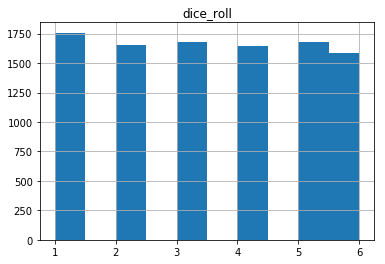

In [5]:
# Histogram -> does it make sense here?
hist = rolls_df.hist(bins=n_bins)

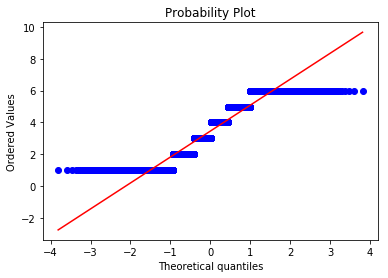

In [6]:
# QQplot or probplot. it's a weird looking one, since it is a descrete distribution
ax1 = plt.subplot()
chart = stats.probplot(rolls, plot=plt)

In [7]:
# Poisson - probability of a given number of events occurring in a fixed interval of time or space. 
# Lambda = variance (mean nuber of events in a specified interval)
s = np.random.poisson(2, 100)
poisson_df = pd.DataFrame({'observation':s})
poisson_df.head()

,observation
0,5
1,5
2,3
3,3
4,3


In [8]:
# Frequency table
n_bins = 20
value_mapper = compute_bins(n_bins, poisson_df, 'observation')
df = prepare_frequency_table(n_bins, poisson_df, 'observation', value_mapper)
df.tail(10)

,bin_number,value,count
10,11,"(3.0, 3.3)",19
11,12,"(3.3, 3.6)",0
12,13,"(3.6, 3.9)",0
13,14,"(3.9, 4.2)",9
14,15,"(4.2, 4.5)",0
15,16,"(4.5, 4.8)",0
16,17,"(4.8, 5.1)",6
17,18,"(5.1, 5.4)",0
18,19,"(5.4, 5.7)",0
19,20,"(5.7, 6.0)",0


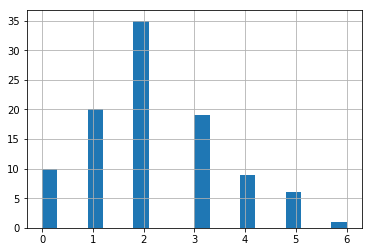

In [9]:
# Histogram 
hist = poisson_df['observation'].hist(bins=n_bins)

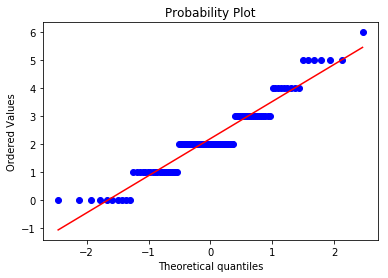

In [10]:
# QQplot or probplot
ax1 = plt.subplot()
chart = stats.probplot(poisson_df['observation'], plot=plt)

In [11]:
# Normal Distribution (Bell curve, Gaussian)
mu, sigma = 9.5, 0.7 # mean and standard deviation
normal_sample = np.random.normal(mu, sigma, 1000)
normal_df_generated = pd.DataFrame({'100dash_sec':normal_sample})
normal_df_generated.head()

,100dash_sec
0,9.919812
1,10.578411
2,10.190034
3,9.900506
4,8.729203


In [12]:
# Frequency table
n_bins = 20
value_mapper = compute_bins(n_bins, normal_df_generated, '100dash_sec')
df = prepare_frequency_table(n_bins, normal_df_generated, '100dash_sec', value_mapper)
df.tail(10)

,bin_number,value,count
10,11,"(9.3, 9.53)",142
11,12,"(9.53, 9.75)",115
12,13,"(9.75, 9.98)",116
13,14,"(9.98, 10.2)",72
14,15,"(10.2, 10.43)",81
15,16,"(10.43, 10.65)",42
16,17,"(10.65, 10.88)",24
17,18,"(10.88, 11.1)",8
18,19,"(11.1, 11.33)",8
19,20,"(11.33, 11.55)",4


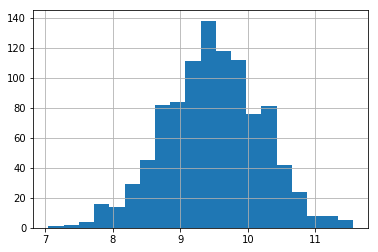

In [13]:
hist = normal_df_generated['100dash_sec'].hist(bins=n_bins)

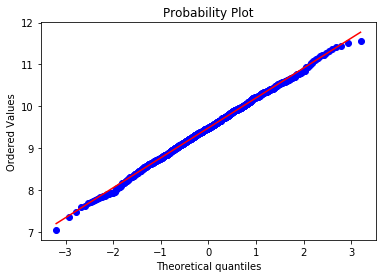

In [14]:
# QQplot or probplot
ax1 = plt.subplot()
chart = stats.probplot(normal_df_generated['100dash_sec'], plot=plt)

In [15]:
# Student's t-distribution
s = np.random.standard_t(10, size=100000)
student_df = pd.DataFrame({'observation':s})
student_df.head()

,observation
0,0.152856
1,0.740599
2,-1.284959
3,-0.423538
4,-1.646019


In [30]:
# Frequency table
n_bins = 20
value_mapper = compute_bins(n_bins, student_df, 'observation')
df = prepare_frequency_table(n_bins, student_df, 'observation', value_mapper)
df.tail(10)

,bin_number,value,count
10,11,"(1.02, 1.77)",11059
11,12,"(1.77, 2.52)",3789
12,13,"(2.52, 3.26)",1092
13,14,"(3.26, 4.01)",320
14,15,"(4.01, 4.76)",84
15,16,"(4.76, 5.5)",25
16,17,"(5.5, 6.25)",4
17,18,"(6.25, 7.0)",3
18,19,"(7.0, 7.75)",3
19,20,"(7.75, 8.49)",1


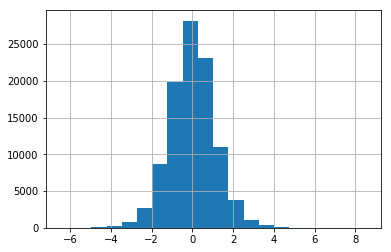

In [31]:
# Histogram 
hist = student_df['observation'].hist(bins=n_bins)

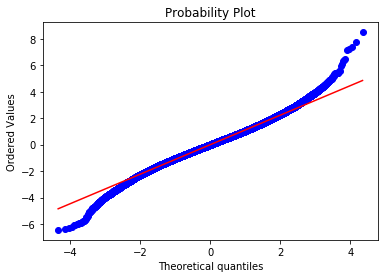

In [32]:
# QQplot or probplot
ax1 = plt.subplot()
chart = stats.probplot(student_df['observation'], plot=plt)

In [33]:
# exponential - the probability of an event occurring between two timeframes
beta = 1 / 20  # lambda - rate of event per interal
sample = np.random.exponential(scale=beta, size=1000)
expon_df = pd.DataFrame({'observation':sample})
expon_df.head()

,observation
0,0.098993
1,0.067357
2,0.043129
3,0.024339
4,0.021153


In [34]:
# Frequency table
n_bins = 20
value_mapper = compute_bins(n_bins, expon_df, 'observation')
df = prepare_frequency_table(n_bins, expon_df, 'observation', value_mapper)
df.tail(10)

,bin_number,value,count
10,11,"(0.17, 0.18)",3
11,12,"(0.18, 0.2)",14
12,13,"(0.2, 0.22)",6
13,14,"(0.22, 0.23)",3
14,15,"(0.23, 0.25)",3
15,16,"(0.25, 0.26)",0
16,17,"(0.26, 0.28)",0
17,18,"(0.28, 0.3)",0
18,19,"(0.3, 0.31)",1
19,20,"(0.31, 0.33)",0


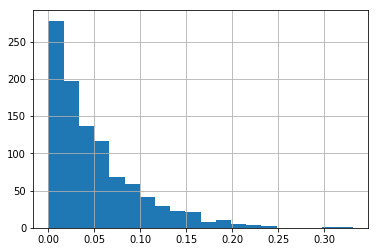

In [35]:
# Histogram 
hist = expon_df['observation'].hist(bins=n_bins)

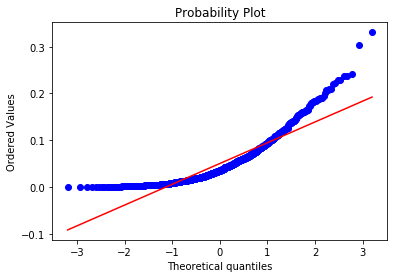

In [36]:
# QQplot or probplot
ax1 = plt.subplot()
chart = stats.probplot(expon_df['observation'], plot=plt)

In [46]:
# Weibull distribution. Variant of Poisson/Exponential. The event frequency might change 
a = 5.0 # shape > 1 -> p increases, < 1 -> decreases
s = np.random.weibull(a, 1000)
weibull_df = pd.DataFrame({'observation':s})
weibull_df.head()

,observation
0,0.969885
1,0.594260
2,0.501624
3,0.836927
4,0.935617


In [47]:
# Frequency table
n_bins = 20
value_mapper = compute_bins(n_bins, weibull_df, 'observation')
df = prepare_frequency_table(n_bins, weibull_df, 'observation', value_mapper)
df.tail(10)

,bin_number,value,count
10,11,"(0.9, 0.97)",137
11,12,"(0.97, 1.04)",118
12,13,"(1.04, 1.11)",107
13,14,"(1.11, 1.17)",73
14,15,"(1.17, 1.24)",63
15,16,"(1.24, 1.31)",27
16,17,"(1.31, 1.38)",15
17,18,"(1.38, 1.45)",5
18,19,"(1.45, 1.52)",1
19,20,"(1.52, 1.59)",2


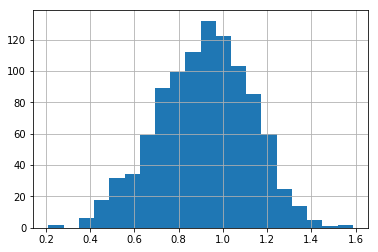

In [48]:
# Histogram 
hist = weibull_df['observation'].hist(bins=n_bins)

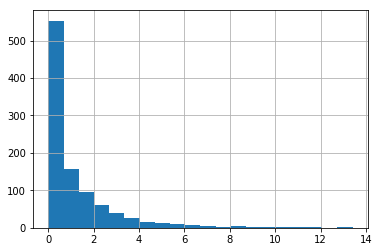

In [53]:
# Some other weibul cases:
# 1. decreasing probab
hist = pd.DataFrame({'observation':np.random.weibull(0.7, 1000)})['observation'].hist(bins=n_bins)

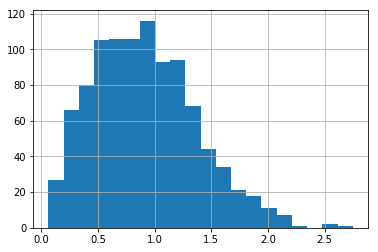

In [60]:
# 2. increasing probab
hist = pd.DataFrame({'observation':np.random.weibull(2.1, 1000)})['observation'].hist(bins=n_bins)

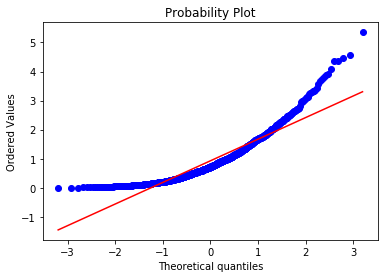

In [45]:
# QQplot or probplot
ax1 = plt.subplot()
chart = stats.probplot(weibull_df['observation'], plot=plt)

In [95]:
# What is this vong distribution her? 
normal_df = pd.read_csv('data/100m.csv')
normal_df['Result'] = normal_df['Result'].mask(normal_df['Result'].eq('None')).dropna()
normal_df = normal_df[pd.notnull(normal_df['Result'])]
normal_df['Result'] = normal_df['Result'].apply(lambda x: float(x))
normal_df.head()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,100M Men,Rio,2016,G,Usain BOLT,JAM,9.81
1,M,100M Men,Rio,2016,S,Justin GATLIN,USA,9.89
2,M,100M Men,Rio,2016,B,Andre DE GRASSE,CAN,9.91
3,M,100M Men,Beijing,2008,G,Usain BOLT,JAM,9.69
4,M,100M Men,Beijing,2008,S,Richard THOMPSON,TTO,9.89


In [51]:
# Frequency table
n_bins = 20
value_mapper = compute_bins(n_bins, normal_df[normal_df['Gender'] == 'M'], 'Result')
df = prepare_frequency_table(n_bins, normal_df, 'Result', value_mapper)
df.tail(10)

,bin_number,value,count
10,11,"(11.12, 11.26)",13
11,12,"(11.26, 11.41)",3
12,13,"(11.41, 11.56)",3
13,14,"(11.56, 11.71)",5
14,15,"(11.71, 11.86)",1
15,16,"(11.86, 12.01)",7
16,17,"(12.01, 12.15)",0
17,18,"(12.15, 12.3)",4
18,19,"(12.3, 12.45)",0
19,20,"(12.45, 12.6)",0


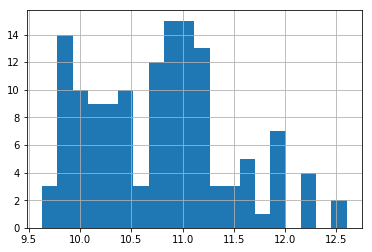

In [52]:
# Histogram 
hist = normal_df['Result'].hist(bins=n_bins)

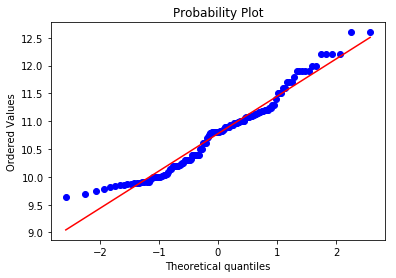

In [53]:
# QQplot or probplot. it's a weird looking one, since it is a descrete distribution
ax1 = plt.subplot()
chart = stats.probplot(normal_df['Result'], plot=plt)